In [1]:
import pandas as pd
import numpy as np
import scipy as stats
import seaborn as sns

In [2]:
data = pd.read_csv("./agtuary-ml/pixels.csv").drop(columns='B04')
data

,B01,B02,B03,B05,B06,B07,B08,B8A,B09,B11,B12,label_id,cloud_prob,label
0,0.0724,0.0984,0.1148,0.1523,0.1629,0.1765,0.1998,0.1959,0.2011,0.3177,0.2703,1,0.0,Sorghum
1,0.0752,0.0954,0.1172,0.1560,0.1656,0.1809,0.2018,0.1996,0.2066,0.3224,0.2757,1,0.0,Sorghum
2,0.0752,0.0932,0.1142,0.1560,0.1656,0.1809,0.1952,0.1996,0.2066,0.3224,0.2757,1,0.0,Sorghum
3,0.0752,0.0962,0.1178,0.1560,0.1656,0.1809,0.2004,0.1996,0.2066,0.3224,0.2757,1,0.0,Sorghum
4,0.0752,0.0928,0.1136,0.1560,0.1656,0.1809,0.1932,0.1996,0.2066,0.3224,0.2757,1,0.0,Sorghum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299889,0.0529,0.0705,0.0821,0.1106,0.1124,0.1202,0.1316,0.1361,0.1393,0.2498,0.2290,0,0.0,Other
299890,0.0529,0.0716,0.0813,0.1106,0.1124,0.1202,0.1316,0.1361,0.1393,0.2498,0.2290,0,0.0,Other
299891,0.0529,0.0712,0.0852,0.1136,0.1167,0.1255,0.1344,0.1413,0.1393,0.2514,0.2299,0,0.0,Other
299892,0.0529,0.0735,0.0869,0.1136,0.1167,0.1255,0.1372,0.1413,0.1393,0.2514,0.2299,0,0.0,Other


### Preparing data
    -   Remove any pixels that have a cloud probability of over 2
    -   Visualise value
    -   Remove potential outliers/nose

In [3]:
# Using a boolean mask
cond = data['cloud_prob'].le(2)
out = data[cond]
out

,B01,B02,B03,B05,B06,B07,B08,B8A,B09,B11,B12,label_id,cloud_prob,label
0,0.0724,0.0984,0.1148,0.1523,0.1629,0.1765,0.1998,0.1959,0.2011,0.3177,0.2703,1,0.0,Sorghum
1,0.0752,0.0954,0.1172,0.1560,0.1656,0.1809,0.2018,0.1996,0.2066,0.3224,0.2757,1,0.0,Sorghum
2,0.0752,0.0932,0.1142,0.1560,0.1656,0.1809,0.1952,0.1996,0.2066,0.3224,0.2757,1,0.0,Sorghum
3,0.0752,0.0962,0.1178,0.1560,0.1656,0.1809,0.2004,0.1996,0.2066,0.3224,0.2757,1,0.0,Sorghum
4,0.0752,0.0928,0.1136,0.1560,0.1656,0.1809,0.1932,0.1996,0.2066,0.3224,0.2757,1,0.0,Sorghum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299889,0.0529,0.0705,0.0821,0.1106,0.1124,0.1202,0.1316,0.1361,0.1393,0.2498,0.2290,0,0.0,Other
299890,0.0529,0.0716,0.0813,0.1106,0.1124,0.1202,0.1316,0.1361,0.1393,0.2498,0.2290,0,0.0,Other
299891,0.0529,0.0712,0.0852,0.1136,0.1167,0.1255,0.1344,0.1413,0.1393,0.2514,0.2299,0,0.0,Other
299892,0.0529,0.0735,0.0869,0.1136,0.1167,0.1255,0.1372,0.1413,0.1393,0.2514,0.2299,0,0.0,Other


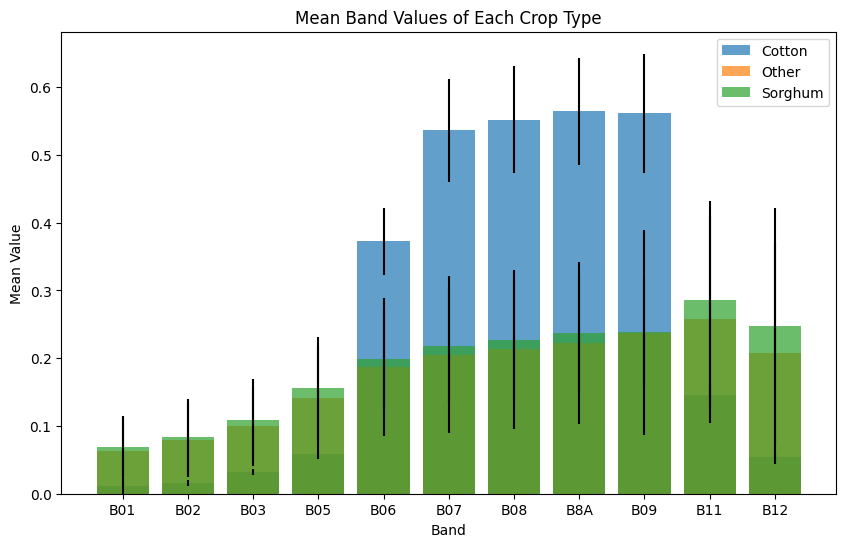

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Select the relevant columns
band_columns = ['B01', 'B02', 'B03', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12']
crop_type_column = 'label'

# Calculate the mean and standard deviation of each band for each crop type
mean_values = data.groupby(crop_type_column)[band_columns].mean()
std_values = data.groupby(crop_type_column)[band_columns].std()

# Set the number of bands
num_bands = len(band_columns)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Define the x-axis range
x = np.arange(num_bands)

# Plot mean values with error bars representing ± 2 standard deviations
for crop_type in mean_values.index:
    crop_mean = mean_values.loc[crop_type]
    crop_std = std_values.loc[crop_type]
    ax.bar(x, crop_mean, yerr=crop_std * 2, label=crop_type, alpha=0.7)

# Set the x-axis tick labels to band names
ax.set_xticks(x)
ax.set_xticklabels(band_columns)

# Set labels and title
ax.set_xlabel('Band')
ax.set_ylabel('Mean Value')
ax.set_title('Mean Band Values of Each Crop Type')

# Add legend
ax.legend()

# Display the plot
plt.show()


In [5]:
data_arr = data[band_columns].to_numpy()
print(data_arr)
# normalising data
new_data = data_arr/1.0027

[[0.0724 0.0984 0.1148 ... 0.2011 0.3177 0.2703]
 [0.0752 0.0954 0.1172 ... 0.2066 0.3224 0.2757]
 [0.0752 0.0932 0.1142 ... 0.2066 0.3224 0.2757]
 ...
 [0.0529 0.0712 0.0852 ... 0.1393 0.2514 0.2299]
 [0.0529 0.0735 0.0869 ... 0.1393 0.2514 0.2299]
 [0.0561 0.0716 0.0869 ... 0.1507 0.2606 0.2386]]


In [6]:
data.loc[:, band_columns] = new_data
data

,B01,B02,B03,B05,B06,B07,B08,B8A,B09,B11,B12,label_id,cloud_prob,label
0,0.072205,0.098135,0.114491,0.151890,0.162461,0.176025,0.199262,0.195372,0.200558,0.316845,0.269572,1,0.0,Sorghum
1,0.074998,0.095143,0.116884,0.155580,0.165154,0.180413,0.201257,0.199063,0.206044,0.321532,0.274958,1,0.0,Sorghum
2,0.074998,0.092949,0.113892,0.155580,0.165154,0.180413,0.194674,0.199063,0.206044,0.321532,0.274958,1,0.0,Sorghum
3,0.074998,0.095941,0.117483,0.155580,0.165154,0.180413,0.199860,0.199063,0.206044,0.321532,0.274958,1,0.0,Sorghum
4,0.074998,0.092550,0.113294,0.155580,0.165154,0.180413,0.192680,0.199063,0.206044,0.321532,0.274958,1,0.0,Sorghum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299889,0.052758,0.070310,0.081879,0.110302,0.112097,0.119876,0.131246,0.135734,0.138925,0.249127,0.228383,0,0.0,Other
299890,0.052758,0.071407,0.081081,0.110302,0.112097,0.119876,0.131246,0.135734,0.138925,0.249127,0.228383,0,0.0,Other
299891,0.052758,0.071008,0.084971,0.113294,0.116386,0.125162,0.134038,0.140920,0.138925,0.250723,0.229281,0,0.0,Other
299892,0.052758,0.073302,0.086666,0.113294,0.116386,0.125162,0.136831,0.140920,0.138925,0.250723,0.229281,0,0.0,Other


In [7]:
print(max(data['B09']))
print(data['label'].unique())
print(data['label_id'].unique())

1.0
['Sorghum' 'Other' 'Cotton']
[1 0 2]


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
data

,B01,B02,B03,B05,B06,B07,B08,B8A,B09,B11,B12,label_id,cloud_prob,label
0,0.072205,0.098135,0.114491,0.151890,0.162461,0.176025,0.199262,0.195372,0.200558,0.316845,0.269572,1,0.0,2
1,0.074998,0.095143,0.116884,0.155580,0.165154,0.180413,0.201257,0.199063,0.206044,0.321532,0.274958,1,0.0,2
2,0.074998,0.092949,0.113892,0.155580,0.165154,0.180413,0.194674,0.199063,0.206044,0.321532,0.274958,1,0.0,2
3,0.074998,0.095941,0.117483,0.155580,0.165154,0.180413,0.199860,0.199063,0.206044,0.321532,0.274958,1,0.0,2
4,0.074998,0.092550,0.113294,0.155580,0.165154,0.180413,0.192680,0.199063,0.206044,0.321532,0.274958,1,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299889,0.052758,0.070310,0.081879,0.110302,0.112097,0.119876,0.131246,0.135734,0.138925,0.249127,0.228383,0,0.0,1
299890,0.052758,0.071407,0.081081,0.110302,0.112097,0.119876,0.131246,0.135734,0.138925,0.249127,0.228383,0,0.0,1
299891,0.052758,0.071008,0.084971,0.113294,0.116386,0.125162,0.134038,0.140920,0.138925,0.250723,0.229281,0,0.0,1
299892,0.052758,0.073302,0.086666,0.113294,0.116386,0.125162,0.136831,0.140920,0.138925,0.250723,0.229281,0,0.0,1


In [9]:
from sklearn.model_selection import train_test_split

# Splitting into features and labels
X = data.iloc[:, :-3]  # Selecting all columns except 'cloud_prob' and 'label'
y = data['label']


In [10]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
fit.scores_
X_new = test.fit_transform(X, y)
X_new

array([[0.17602473, 0.19926199, 0.19537249, 0.20055849],
       [0.18041289, 0.20125661, 0.19906253, 0.20604368],
       [0.18041289, 0.19467438, 0.19906253, 0.20604368],
       ...,
       [0.12516206, 0.1340381 , 0.14091952, 0.1389249 ],
       [0.12516206, 0.13683056, 0.14091952, 0.1389249 ],
       [0.12815398, 0.13742894, 0.14441009, 0.15029421]])

In [11]:
# Splitting into training and test sets with 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
X_train

array([[0.14091952, 0.1505934 , 0.15428343, 0.1554802 ],
       [0.20454772, 0.20923507, 0.22369602, 0.22858283],
       [0.27196569, 0.27904657, 0.28792261, 0.36990127],
       ...,
       [0.20634287, 0.21302483, 0.22449387, 0.2258901 ],
       [0.15877132, 0.17153685, 0.17183604, 0.17253416],
       [0.16515408, 0.17053954, 0.183704  , 0.18619727]])

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
(X_train.shape, y_train.shape)
X_train

array([[0.11399222, 0.12127256, 0.12446395, 0.12556099],
       [0.17024035, 0.17971477, 0.18749377, 0.19188192],
       [0.25850204, 0.2437419 , 0.27505735, 0.29390645],
       ...,
       [0.20783884, 0.21581729, 0.22279844, 0.22299791],
       [0.27575546, 0.25191982, 0.29360726, 0.35524085],
       [0.17532662, 0.18170938, 0.19138327, 0.19417573]])

In [13]:
# import torch

# # Convert X_train and X_test to torch tensors
# X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
# X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
# X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

# y_test_tensor = torch.tensor(y_test, dtype= torch.float32)
# y_train_tensor = torch.tensor(y_train, dtype= torch.float32)
# y_val_tensor = torch.tensor(y_val, dtype= torch.float32)
# (X_test_tensor.shape, y_test_tensor.shape)

In [14]:
import cv2 

band_files = ['B01.tif', 'B02.tif', 'B03.tif', 'B04.tif', 'B05.tif', 'B06.tif', 'B07.tif', 'B08.tif', 'B8A.tif', 'B09.tif', 'B11.tif', 'B12.tif']

for band_file in band_files:
    image = cv2.imread('/Users/tinas/Documents/machine learning challenege/agtuary-ml/' + band_file)
    if image is not None:
        height, width, channels = image.shape
        print('Image size - Width: {}, Height: {}, Channels: {}'.format(width, height, channels))
    else:
        print('Failed to read the image:', band_file)

Image size - Width: 4000, Height: 4000, Channels: 3
Image size - Width: 4000, Height: 4000, Channels: 3
Image size - Width: 4000, Height: 4000, Channels: 3
Image size - Width: 4000, Height: 4000, Channels: 3
Image size - Width: 4000, Height: 4000, Channels: 3
Image size - Width: 4000, Height: 4000, Channels: 3
Image size - Width: 4000, Height: 4000, Channels: 3
Image size - Width: 4000, Height: 4000, Channels: 3
Image size - Width: 4000, Height: 4000, Channels: 3
Image size - Width: 4000, Height: 4000, Channels: 3
Image size - Width: 4000, Height: 4000, Channels: 3
Image size - Width: 4000, Height: 4000, Channels: 3


In [15]:
import numpy as np
from PIL import Image

for band_file in band_files:
    image = Image.open('/Users/tinas/Documents/machine learning challenege/agtuary-ml/' + band_file)
    pixels = np.array(image)
    rescaled_pixels = pixels / 10000.0
    rescaled_image = Image.fromarray(rescaled_pixels)
    rescaled_image.save("rescaled_" + band_file)



## Using CNN
    - one dimensional CNN since image data converted into tabular
    - Sequential model for image classification
    
### Layers
1. Convolution
2. Maxpooling
3. Dropout
4. Flatten
5. Dense

In [23]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch 
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [24]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cpu


In [ ]:
NUM_FEATURES = 4
NUM_CLASSES = 3
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)

In [18]:
import torch.optim as optim
 

In [19]:
# import torch
# import torch.nn as nn

# input_size = 11  # Number of features
# hidden_size = 64  # Number of neurons in the hidden layer
# output_size = 1  # Number of output classes (assuming regression)

# # Define your model
# model = nn.Sequential(
#     nn.Linear(input_size, hidden_size),
#     nn.ReLU(),
#     nn.Linear(hidden_size, output_size)
# )

# # Forward pass through the model
# input_data = torch.randn(59979, 11)  # Assuming you have your input data in this shape
# output = model(input_data)


In [20]:
# output

In [21]:
# output_array = output.detach().numpy()
# output_array